# ASELSAN STOCK ANALYSIS

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import math
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [8]:
stock = pd.read_csv('ASELS.IS.csv')
stock['Date'] = pd.to_datetime(stock['Date'])
stock.head()
drop_cols=['Open','High','Low','Adj Close','Volume']
stock.drop(drop_cols, axis=1, inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-01,7.050,7.475,5.900,6.950,6.824485,21077874
1,2015-07-01,6.975,7.950,6.950,7.500,7.364552,19312338
2,2015-08-01,7.450,7.450,6.825,7.125,6.996325,9818548
3,2015-09-01,7.050,7.125,6.500,6.875,6.750840,10430822
4,2015-10-01,6.975,7.575,6.900,6.975,6.849034,16259124


In [13]:
stock['ASELS Return']=stock['Close']/stock['Close'].shift(1) - 1
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ASELS Return
56,2020-02-01,23.500000,30.660000,23.260000,27.66,27.66,921306619,0.176020
57,2020-03-01,28.480000,31.580000,20.120001,23.60,23.60,794224398,-0.146782
58,2020-04-01,23.020000,27.799999,22.700001,27.18,27.18,685076784,0.151695
59,2020-05-01,26.700001,30.459999,26.260000,30.10,30.10,419992348,0.107432
60,2020-05-29,30.100000,30.240000,29.900000,30.18,30.18,19293535,0.002658


In [14]:
mean = stock['ASELS Return'].mean()
std = stock['ASELS Return'].std()
kurtosis = stock['ASELS Return'].kurtosis()
print('mean =',mean)
print('Std deviation =',std)
print('Kurtosis =',kurtosis)

mean = 0.02912545337295739
Std deviation = 0.09545846999965475
Kurtosis = -0.09259717215855678


In [15]:
#MOVING AVERAGE CALCULATION
stock['MAVG5'] = stock['Close'].rolling(window=5).mean()
stock['MAVG20'] = stock['Close'].rolling(window=10).mean()

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


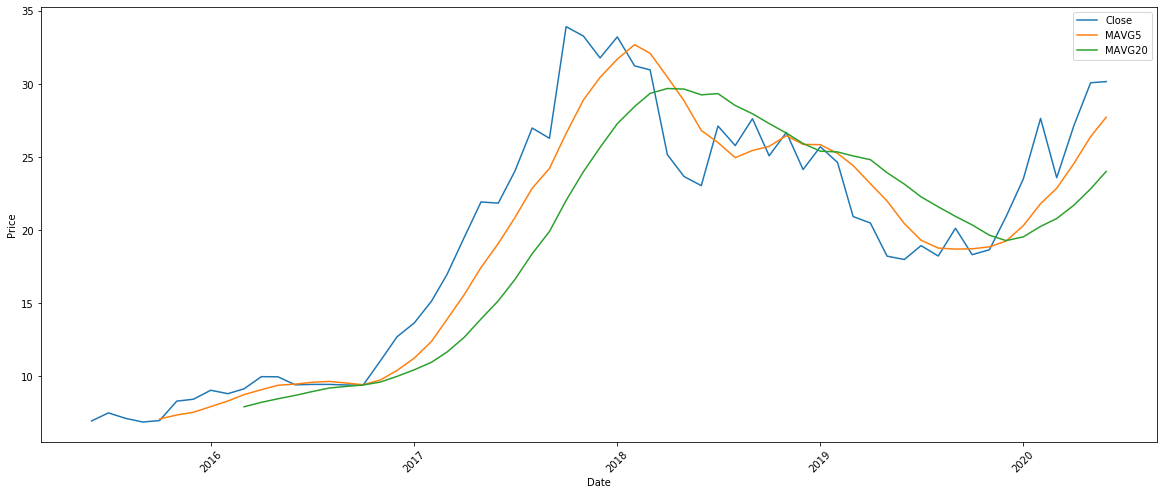

In [16]:
#PLOTTING MOVING AVERAGES'S AND CLOSING PRICE
plt.figure(figsize=(20,8))
plt.plot('Date','Close', data=stock)
plt.plot('Date','MAVG5', data=stock)
plt.plot('Date','MAVG20', data=stock)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.savefig('Aselsan_MA.png')
plt.legend()

In [17]:
stock.fillna(0)

,Date,Open,High,Low,Close,Adj Close,Volume,ASELS Return,MAVG5,MAVG20
0,2015-06-01,7.050000,7.475000,5.900000,6.950000,6.824485,21077874,0.000000,0.000000,0.000000
1,2015-07-01,6.975000,7.950000,6.950000,7.500000,7.364552,19312338,0.079137,0.000000,0.000000
2,2015-08-01,7.450000,7.450000,6.825000,7.125000,6.996325,9818548,-0.050000,0.000000,0.000000
3,2015-09-01,7.050000,7.125000,6.500000,6.875000,6.750840,10430822,-0.035088,0.000000,0.000000
4,2015-10-01,6.975000,7.575000,6.900000,6.975000,6.849034,16259124,0.014545,7.085000,0.000000
5,2015-11-01,7.425000,8.510000,7.175000,8.305000,8.155015,28903100,0.190681,7.356000,0.000000
6,2015-12-01,8.330000,8.695000,7.500000,8.435000,8.282667,27143418,0.015653,7.543000,0.000000
7,2016-01-01,8.435000,9.540000,8.320000,9.050000,8.886560,24674388,0.072910,7.928000,0.000000
8,2016-02-01,9.075000,9.170000,8.250000,8.815000,8.655802,17077136,-0.025967,8.316000,0.000000
9,2016-03-01,8.840000,9.550000,8.435000,9.150000,8.984753,41578218,0.038003,8.751000,7.918000


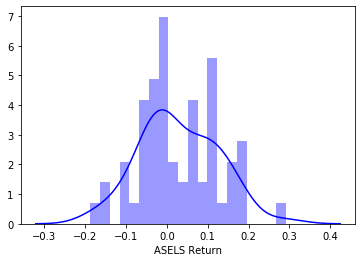

In [121]:
sns.distplot(stock['ASELS Return'],bins=20,color='blue')

In [134]:
#COMPTETITORS STOCK DATA
start = datetime.datetime(2015, 6, 1)
end = datetime.datetime(2020, 5, 29)
comps = web.DataReader(['ASELS.IS','OTKAR.IS', 'TMSN.IS', 'NETAS.IS', 'KATMR.IS',],'yahoo',start=start,end=end)['Close']

In [135]:
comps.head()

Symbols,ASELS.IS,KATMR.IS,NETAS.IS,OTKAR.IS,TMSN.IS
Date,,,,,
2015-06-01,6.800,1.74927,8.64,85.500000,7.12
2015-06-02,6.875,1.78529,8.70,86.000000,7.30
2015-06-03,6.875,1.79558,8.82,88.699997,7.42
2015-06-04,6.875,1.76471,8.69,88.000000,7.25
2015-06-05,6.875,1.76471,8.62,86.849998,7.24


In [160]:
#CORRELATION OF COMPETITORS
returncomps= comps.pct_change()
correlation= comps.corr()
print(correlation)

Symbols   ASELS.IS  KATMR.IS  NETAS.IS  OTKAR.IS   TMSN.IS
Symbols                                                   
ASELS.IS  1.000000  0.518057  0.352537  0.222328 -0.312972
KATMR.IS  0.518057  1.000000  0.659804  0.277637  0.488786
NETAS.IS  0.352537  0.659804  1.000000  0.371248  0.567920
OTKAR.IS  0.222328  0.277637  0.371248  1.000000  0.103076
TMSN.IS  -0.312972  0.488786  0.567920  0.103076  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000129BD978>,
      dtype=object)

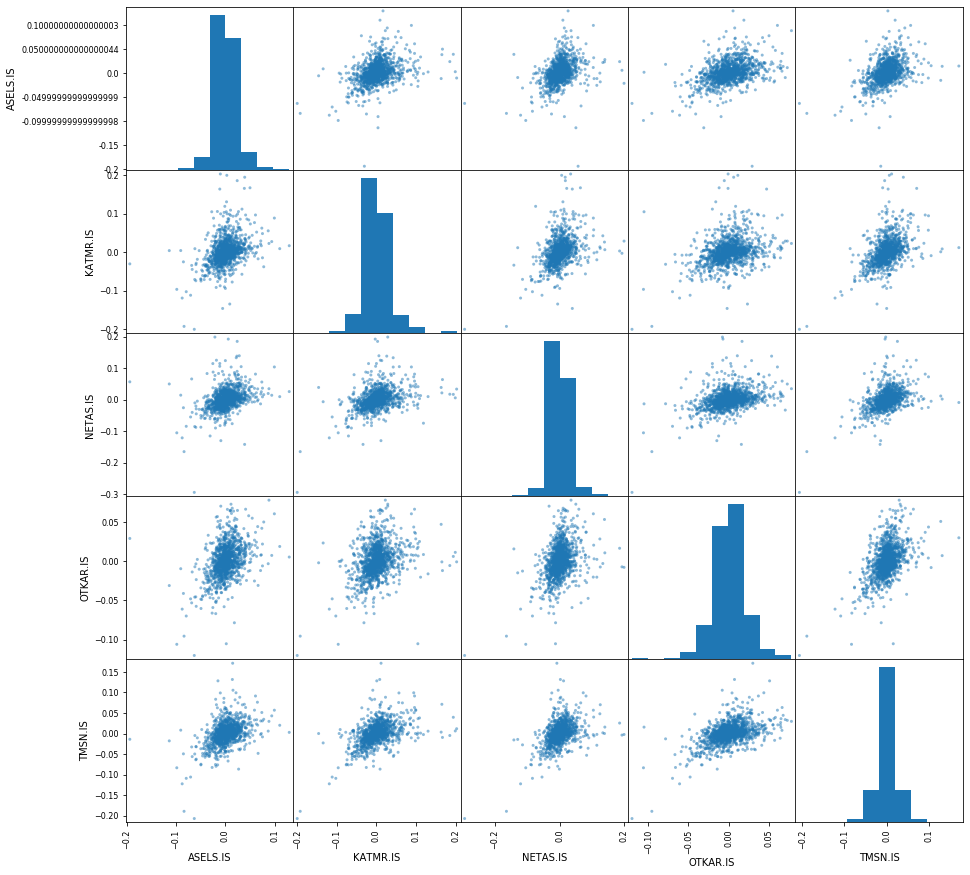

In [156]:
pd.plotting.scatter_matrix(returncomps, figsize=(15,15))

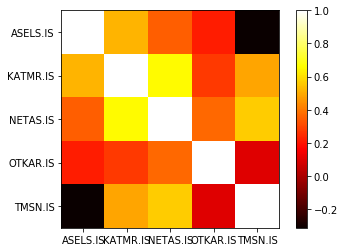

In [158]:
#Heat Map correlation
plt.imshow(correlation, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns)
plt.yticks(range(len(correlation)), correlation.columns);

In [161]:
market = web.DataReader(['XU100.IS','ASELS.IS'],'yahoo',start=start,end=end)['Close']
market.head()

Symbols,ASELS.IS,XU100.IS
Date,,
2015-06-01,6.800,80429.101562
2015-06-02,6.875,81420.203125
2015-06-03,6.875,83393.601562
2015-06-04,6.875,82499.000000
2015-06-05,6.875,81943.398438


In [166]:
#ASELSAN Beta
marketret= market.pct_change()
cov= marketret.cov()
cov_with_market= cov.iloc[0,1]
var_market= marketret['XU100.IS'].var()
ASELS_Beta = cov_with_market/var_market
ASELS_Beta


0.7451136275501207

In [169]:
#Expected Return of ASELSAN
ASELS_ER= 0.00908+ ASELS_Beta*(marketret['XU100.IS'].mean()- 0.00908)
ASELS_ER

0.002502238506046908

In [170]:
##STOCK PRICE PREDICTION

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [173]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ASELS Return,MAVG5,MAVG20
0,2015-06-01,7.050,7.475,5.900,6.950,6.824485,21077874,NaN,NaN,NaN
1,2015-07-01,6.975,7.950,6.950,7.500,7.364552,19312338,0.079137,NaN,NaN
2,2015-08-01,7.450,7.450,6.825,7.125,6.996325,9818548,-0.050000,NaN,NaN
3,2015-09-01,7.050,7.125,6.500,6.875,6.750840,10430822,-0.035088,NaN,NaN
4,2015-10-01,6.975,7.575,6.900,6.975,6.849034,16259124,0.014545,7.085,NaN


In [18]:
df = stock[['Close']]
df.head()

,Close
0,6.950
1,7.500
2,7.125
3,6.875
4,6.975


In [118]:
#Create variable to predict'x' days in future
future_months= 24
#Create a new column shifted 'x' units up
df['Prediction']= df[['Close']].shift(-future_months)
df.head()

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Close,Prediction
0,6.950,21.860001
1,7.500,24.059999
2,7.125,27.000000
3,6.875,26.299999
4,6.975,33.939999


In [119]:
#Create feature data set
X= np.array(df.drop(['Prediction'],1))[:-future_months]
print(X)

[[ 6.95    ]
 [ 7.5     ]
 [ 7.125   ]
 [ 6.875   ]
 [ 6.975   ]
 [ 8.305   ]
 [ 8.435   ]
 [ 9.05    ]
 [ 8.815   ]
 [ 9.15    ]
 [ 9.98    ]
 [ 9.97    ]
 [ 9.42    ]
 [ 9.45    ]
 [ 9.45    ]
 [ 9.41    ]
 [ 9.4     ]
 [11.06    ]
 [12.71    ]
 [13.66    ]
 [15.15    ]
 [16.99    ]
 [19.530001]
 [21.940001]
 [21.860001]
 [24.059999]
 [27.      ]
 [26.299999]
 [33.939999]
 [33.299999]
 [31.799999]
 [33.240002]
 [31.26    ]
 [30.98    ]
 [25.18    ]
 [23.68    ]
 [23.059999]]


In [120]:
#Create Target Data Set (y)
y= np.array(df['Prediction'])[:-future_months]
print(y)

[21.860001 24.059999 27.       26.299999 33.939999 33.299999 31.799999
 33.240002 31.26     30.98     25.18     23.68     23.059999 27.139999
 25.799999 27.639999 25.1      26.700001 24.16     25.719999 24.639999
 20.940001 20.5      18.23     18.       18.950001 18.24     20.139999
 18.33     18.67     20.940001 23.52     27.66     23.6      27.18
 30.1      30.18    ]


In [121]:
#Split data into train and test
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.30)

In [122]:
#Create Models
#Create Tree Regressor
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create Linear Regression Model
lr = LinearRegression().fit(x_train, y_train)


In [123]:
#Obtain last rows of feature data set
x_future= df.drop(['Prediction'], 1)[:-future_months]
x_future= x_future.tail(future_months)
x_future= np.array(x_future)
print(x_future)

[[ 9.45    ]
 [ 9.45    ]
 [ 9.41    ]
 [ 9.4     ]
 [11.06    ]
 [12.71    ]
 [13.66    ]
 [15.15    ]
 [16.99    ]
 [19.530001]
 [21.940001]
 [21.860001]
 [24.059999]
 [27.      ]
 [26.299999]
 [33.939999]
 [33.299999]
 [31.799999]
 [33.240002]
 [31.26    ]
 [30.98    ]
 [25.18    ]
 [23.68    ]
 [23.059999]]


In [124]:
#Model tree prediction
tree_prediction= tree.predict(x_future)
print(tree_prediction)
print()
#Model Linear Regression
lr_prediction= lr.predict(x_future)
print(lr_prediction)

[25.799999 25.799999 27.639999 25.1      26.700001 24.16     24.16
 24.16     24.16     18.       18.23     18.       18.950001 20.139999
 20.139999 18.67     18.67     23.52     23.52     23.52     23.52
 27.18     30.1      30.18    ]

[26.68460336 26.68460336 26.69387992 26.69619906 26.31122207 25.92856422
 25.70824606 25.36269443 24.93597295 24.34691154 23.78799917 23.80655227
 23.29634227 22.61451533 22.77685525 21.00503345 21.15345832 21.50132909
 21.16737245 21.62656233 21.69149821 23.03659853 23.3844693  23.52825612]


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

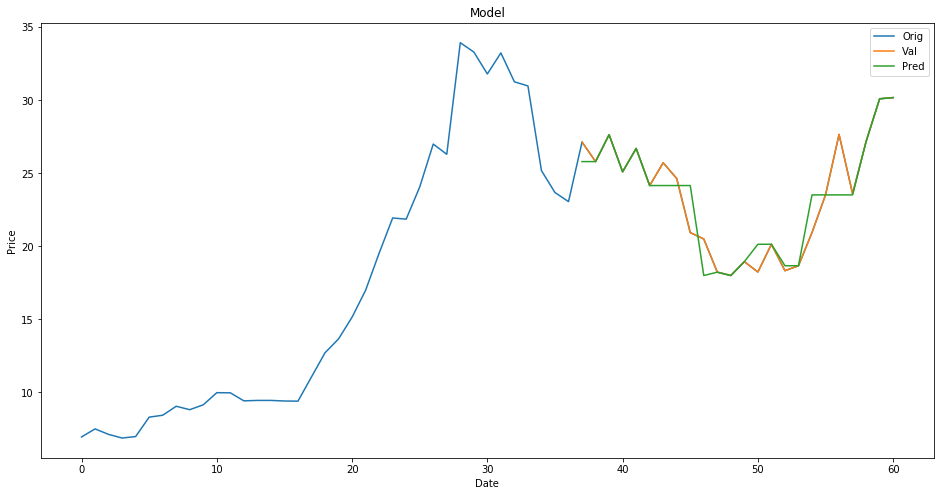

In [125]:
#Visualization Tree
predictions= tree_prediction 
valid= df[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.savefig('Decision_Tree.png')
plt.show


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

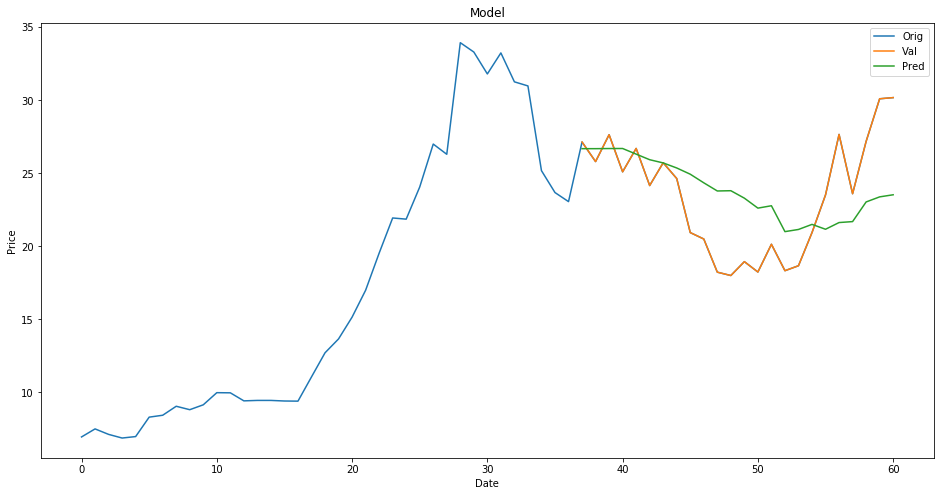

In [126]:
#Visualization LR
predictions= lr_prediction 
valid= df[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.savefig('Regression.png')
plt.show